### 1. Importing modules.

In [54]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import scipy.stats as scistats

### 2. Importing data.

In [55]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

print('Training data shape: ', raw_train.shape)
print('Testing data shape: ', raw_test.shape)

Training data shape:  (103904, 25)
Testing data shape:  (25976, 25)


In [56]:
# Quick glance at the data.

raw_train.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [57]:
raw_test.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


### 2.1 Dropping columns.

In [58]:
# 'Unnamed' and 'id' columms are irrelevant and needs to be dropped.

raw_train.drop(columns = ['Unnamed: 0', 'id'], inplace = True)
raw_test.drop(columns = ['Unnamed: 0', 'id'], inplace = True)

### 2.2 Describing columns to check for any outliers if any.

In [59]:
# Describing numerical data.

raw_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [60]:
# Describing object data.

raw_train.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


### 2.3 Checking the dtypes.

In [61]:
raw_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

### 3 EDA.

### 3.1 Columns with 25% null values.

In [62]:
# Checking for columns with 25% null values.

train_null_data = raw_train.isnull().sum()/raw_train.shape[0]*100 
train_null_cols = train_null_data[train_null_data > 25].keys().to_list()

test_null_data = raw_test.isnull().sum()/raw_test.shape[0]*100 
test_null_cols = test_null_data[test_null_data > 25].keys().to_list()

print('Null columns in Training data:', train_null_cols)
print('Null columns in Testing data:', test_null_cols)

Null columns in Training data: []
Null columns in Testing data: []


In [63]:
# No column is missing more than 25% data.

### 3.2 Columns with low variance.

### 3.3 Splitting the data.

In [64]:
# Splitting the raw_train data into train and valid data.
# Data is large so I can use train_test_split.

from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(raw_train, test_size = 0.3, 
                                          random_state = 0)

train_data.reset_index(drop = True, inplace = True)
valid_data.reset_index(drop = True, inplace = True)

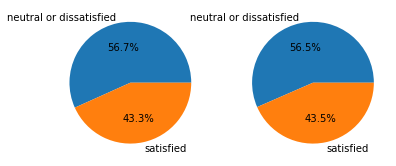

In [65]:
# Visualizing the proportions.

train_pie = train_data['satisfaction'].value_counts()/train_data.shape[0]*100
valid_pie = valid_data['satisfaction'].value_counts()/valid_data.shape[0]*100

plt.Figure(figsize = (5, 5))
plt.subplot(1, 2, 1)
plt.pie(x = train_pie, labels = train_pie.keys(), autopct = '%1.1f%%')

plt.subplot(1, 2, 2)
plt.pie(x = valid_pie, labels = valid_pie.keys(), autopct = '%1.1f%%')
plt.show()

### 3.4 Validating zeros.

In [66]:
# Validating zero in train_data.

(train_data == 0).sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                 2165
Departure/Arrival time convenient     3718
Ease of Online booking                3108
Gate location                            1
Food and drink                          75
Online boarding                       1692
Seat comfort                             0
Inflight entertainment                   8
On-board service                         3
Leg room service                       334
Baggage handling                         0
Checkin service                          0
Inflight service                         3
Cleanliness                              5
Departure Delay in Minutes           41205
Arrival Delay in Minutes             40772
satisfaction                             0
dtype: int6

In [67]:
# Validating zero in vaid_data.

(valid_data == 0).sum()

Gender                                   0
Customer Type                            0
Age                                      0
Type of Travel                           0
Class                                    0
Flight Distance                          0
Inflight wifi service                  938
Departure/Arrival time convenient     1582
Ease of Online booking                1379
Gate location                            0
Food and drink                          32
Online boarding                        736
Seat comfort                             1
Inflight entertainment                   6
On-board service                         0
Leg room service                       138
Baggage handling                         0
Checkin service                          1
Inflight service                         0
Cleanliness                              7
Departure Delay in Minutes           17463
Arrival Delay in Minutes             17387
satisfaction                             0
dtype: int6

In [68]:
# All the above features can have zeros.

### 3.5 Checking for null columns.

In [69]:
# Checking for null columns.

null_train_data = train_data.isnull().sum()
null_train_cols = null_train_data[null_train_data > 0].keys().to_list()
print('Null columns in train_data are:', null_train_cols)

null_valid_data = valid_data.isnull().sum()
null_valid_cols = null_valid_data[null_valid_data > 0].keys().to_list()
print('Null columns in valid_data are:', null_valid_cols)

null_test_data = raw_test.isnull().sum()
null_test_cols = null_test_data[null_test_data > 0].keys().to_list()
print('Null columns in test_data are:', null_test_cols)

Null columns in train_data are: ['Arrival Delay in Minutes']
Null columns in valid_data are: ['Arrival Delay in Minutes']
Null columns in test_data are: ['Arrival Delay in Minutes']


In [70]:
# All the datasets have same null column.

### 3.6 Filling the null values.

In [71]:
from sklearn.impute import SimpleImputer

mode_imp = SimpleImputer(strategy = 'most_frequent')

train_data_array = mode_imp.fit_transform(train_data)
valid_data_array = mode_imp.transform(valid_data)
raw_test_array = mode_imp.transform(raw_test)

imp_train_data = pd.DataFrame(train_data_array, 
                              columns = train_data.columns.to_list())
imp_valid_data = pd.DataFrame(valid_data_array, 
                              columns = valid_data.columns.to_list())
imp_test_data = pd.DataFrame(raw_test_array, 
                             columns = raw_test.columns.to_list())

In [72]:
# Cross checking for null values.

print('Null columns in train data:', imp_train_data.isnull().sum().sum())
print('Null columns in valid data:', imp_valid_data.isnull().sum().sum())
print('Null columns in test data:', imp_test_data.isnull().sum().sum())

Null columns in train data: 0
Null columns in valid data: 0
Null columns in test data: 0


In [73]:
# Checking for dtypes.

imp_train_data.dtypes

Gender                               object
Customer Type                        object
Age                                  object
Type of Travel                       object
Class                                object
Flight Distance                      object
Inflight wifi service                object
Departure/Arrival time convenient    object
Ease of Online booking               object
Gate location                        object
Food and drink                       object
Online boarding                      object
Seat comfort                         object
Inflight entertainment               object
On-board service                     object
Leg room service                     object
Baggage handling                     object
Checkin service                      object
Inflight service                     object
Cleanliness                          object
Departure Delay in Minutes           object
Arrival Delay in Minutes             object
satisfaction                    

In [74]:
# Modifying the dtypes

for col in imp_train_data.columns.to_list():
    imp_train_data[col] = imp_train_data[col].astype(type(imp_train_data[col][0]))
    imp_valid_data[col] = imp_valid_data[col].astype(type(imp_valid_data[col][0]))
    imp_test_data[col] = imp_test_data[col].astype(type(imp_test_data[col][0]))
    
# Cross checking
imp_train_data.dtypes

Gender                                object
Customer Type                         object
Age                                    int32
Type of Travel                        object
Class                                 object
Flight Distance                        int32
Inflight wifi service                  int32
Departure/Arrival time convenient      int32
Ease of Online booking                 int32
Gate location                          int32
Food and drink                         int32
Online boarding                        int32
Seat comfort                           int32
Inflight entertainment                 int32
On-board service                       int32
Leg room service                       int32
Baggage handling                       int32
Checkin service                        int32
Inflight service                       int32
Cleanliness                            int32
Departure Delay in Minutes             int32
Arrival Delay in Minutes             float64
satisfacti

### 4. Assumptions for Logistic Regression.
- Independent features.
- Normally distributed data.
- No outliers.

### 4.1 Independent features.

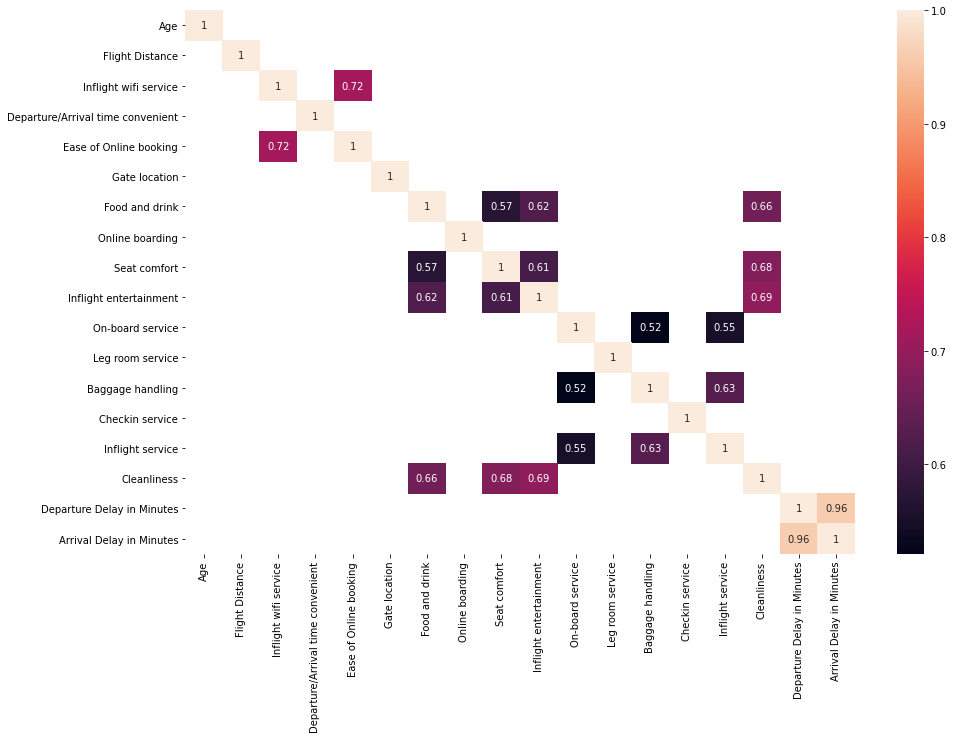

In [75]:
plt.figure(figsize = (15, 10))
corr_matrix = imp_train_data.corr()
sb.heatmap(corr_matrix[corr_matrix > 0.5], annot = True)
plt.show()

### 4.2 Normally distributed data.

In [76]:
NND = []
ND = []

for col in imp_train_data.select_dtypes(exclude = 'object').columns:
    p_val = scistats.normaltest(imp_train_data[col])[0]
    
    if p_val < 0.05:
        NND.append(col)
    else:
        ND.append(col)
        
print('Normally distributed columns are: \n', ND, '\n')
print('Not normally distributed columns are: \n', NND, '\n')

Normally distributed columns are: 
 ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes'] 

Not normally distributed columns are: 
 [] 



In [77]:
# All the data is normally distributed but skewness may be present.

In [78]:
# Splitting the data into numerical and categorical data.

num_train_data = imp_train_data.select_dtypes(exclude = 'object')
obj_train_data = imp_train_data.select_dtypes(include = 'object')

num_valid_data = imp_valid_data.select_dtypes(exclude = 'object')
obj_valid_data = imp_valid_data.select_dtypes(include = 'object')

num_test_data = imp_test_data.select_dtypes(exclude = 'object')
obj_test_data = imp_test_data.select_dtypes(include = 'object')

In [79]:
# Exploring numerical data.

print(num_train_data.columns.to_list())

['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


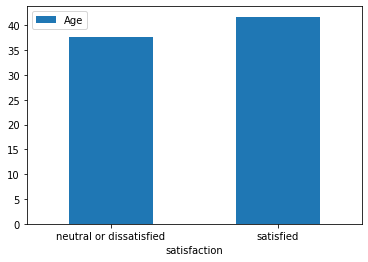

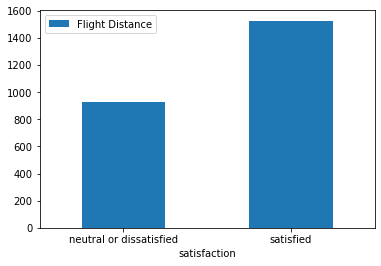

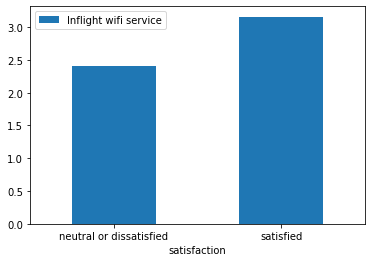

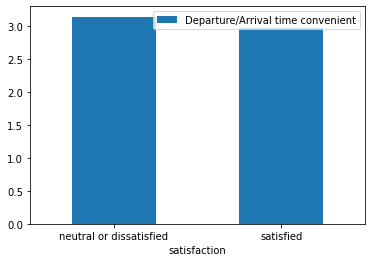

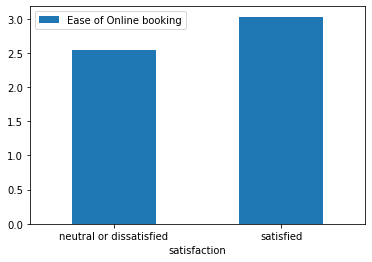

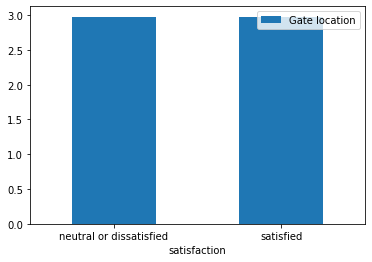

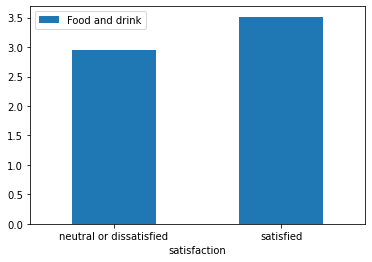

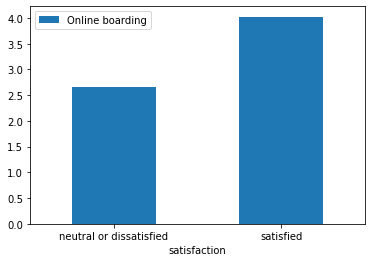

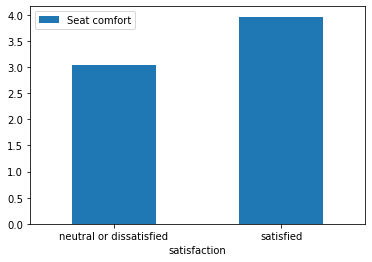

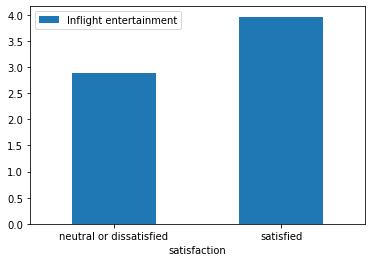

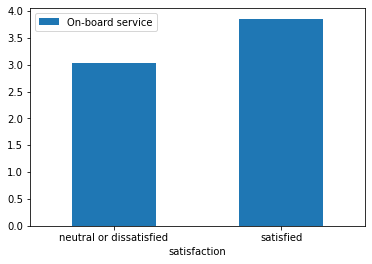

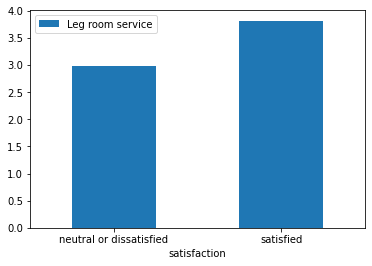

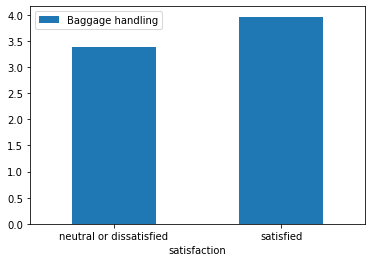

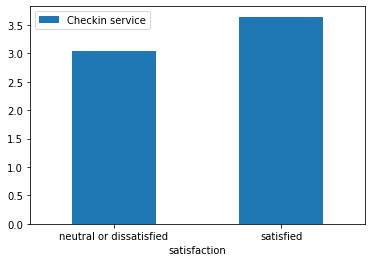

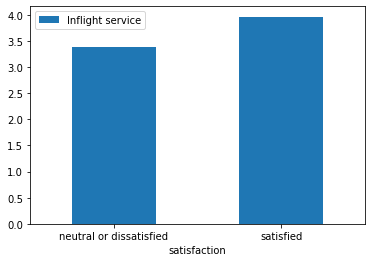

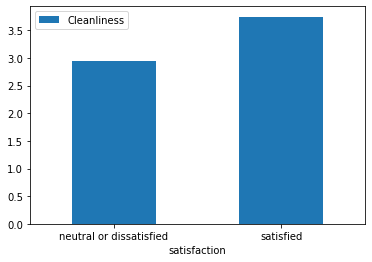

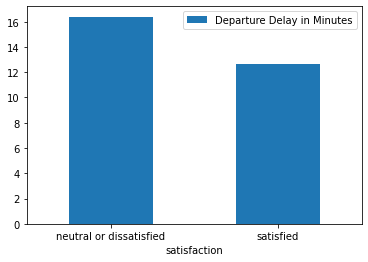

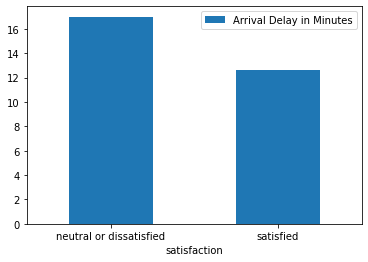

In [80]:
for col in num_train_data.columns:
    data = imp_train_data[[col, 'satisfaction']].groupby('satisfaction').mean()
    data.plot(kind = 'bar', rot = 'horizontal')
    plt.show()

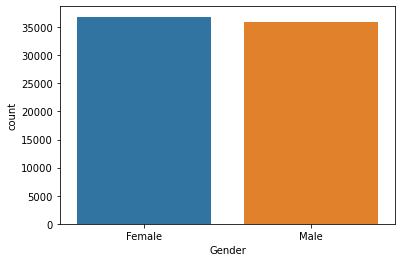

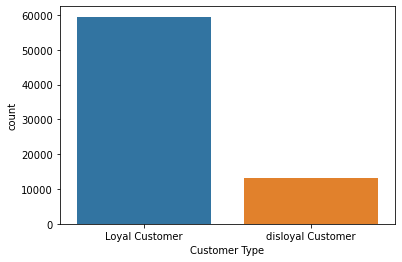

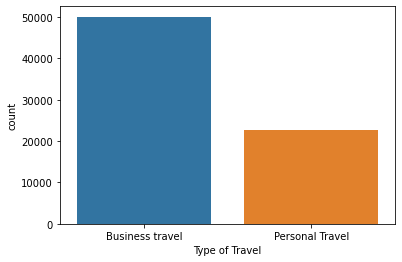

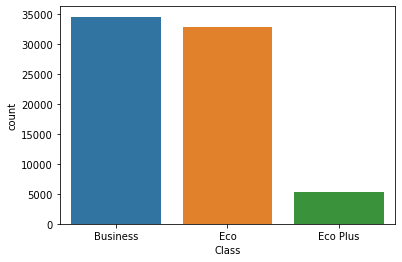

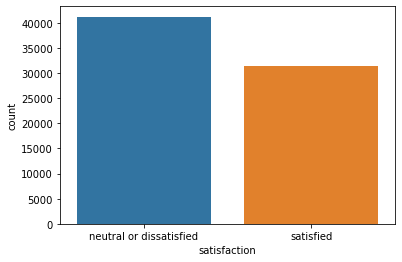

In [81]:
for col in obj_train_data.columns:
    sb.countplot(x = obj_train_data[col])
    plt.show()

In [82]:
# Mapping
# Class represents socio economic status(just like Grade)

obj_train_data = obj_train_data.replace({'Gender': {'Female': 1, 
                                                    'Male': 0},
                                         'Customer Type': {'Loyal Customer': 1, 
                                                           'disloyal Customer': 0},
                                         'Type of Travel': {'Business travel': 1,
                                                            'Personal Travel': 0},
                                         'Class': {'Business': 1, 
                                                   'Eco': 2,
                                                   'Eco Plus': 3},
                                         'satisfaction': {'neutral or dissatisfied': 0,
                                                          'satisfied': 1}
                                        })

In [83]:
obj_valid_data = obj_valid_data.replace({'Gender': {'Female': 1, 
                                                    'Male': 0},
                                         'Customer Type': {'Loyal Customer': 1, 
                                                           'disloyal Customer': 0},
                                         'Type of Travel': {'Business travel': 1,
                                                            'Personal Travel': 0},
                                         'Class': {'Business': 1, 
                                                   'Eco': 2,
                                                   'Eco Plus': 3},
                                         'satisfaction': {'neutral or dissatisfied': 0,
                                                          'satisfied': 1}
                                        })

In [84]:
obj_test_data = obj_test_data.replace({'Gender': {'Female': 1, 
                                                    'Male': 0},
                                         'Customer Type': {'Loyal Customer': 1, 
                                                           'disloyal Customer': 0},
                                         'Type of Travel': {'Business travel': 1,
                                                            'Personal Travel': 0},
                                         'Class': {'Business': 1, 
                                                   'Eco': 2,
                                                   'Eco Plus': 3},
                                         'satisfaction': {'neutral or dissatisfied': 0,
                                                          'satisfied': 1}
                                        })

In [85]:
# Inserting 'Class' in num_train_data for standard scaling.

num_train_data.insert(loc = 0, column = 'Class',
                      value = obj_train_data['Class'].values)
obj_train_data.drop(columns = 'Class', inplace = True)

num_valid_data.insert(loc = 0, column = 'Class',
                      value = obj_valid_data['Class'].values)
obj_valid_data.drop(columns = 'Class', inplace = True)

num_test_data.insert(loc = 0, column = 'Class',
                     value = obj_test_data['Class'].values)
obj_test_data.drop(columns = 'Class', inplace = True)

In [86]:
# Checking for skewed data.

skewness = num_train_data.apply(lambda x: scistats.skew(x))
skewed_cols = skewness[abs(skewness) > 0.75].keys().to_list()

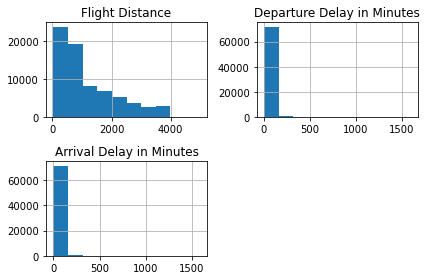

In [87]:
# Distributions.

num_train_data[skewed_cols].hist()
plt.tight_layout()
plt.show()

In [88]:
# Applying log transformations.

train_log_data = np.log1p(num_train_data[skewed_cols])
valid_log_data = np.log1p(num_valid_data[skewed_cols])
test_log_data = np.log1p(num_test_data[skewed_cols])

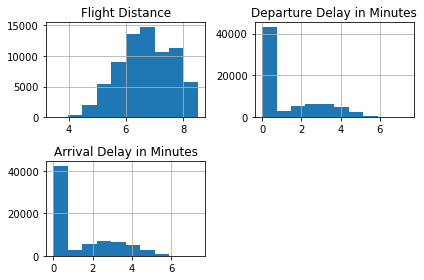

In [89]:
# Distributions.

train_log_data.hist()
plt.tight_layout()
plt.show()

In [90]:
# Dropping skewed columns from num_train_data.

for col in skewed_cols:
    num_train_data = num_train_data.drop(columns = col)
    num_valid_data = num_valid_data.drop(columns = col)
    num_test_data = num_test_data.drop(columns = col)

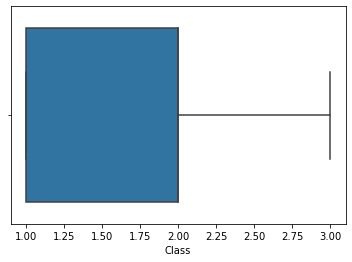

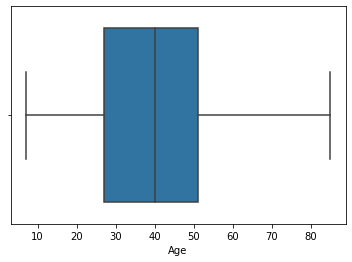

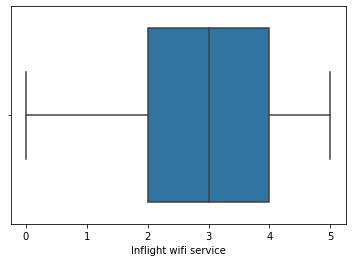

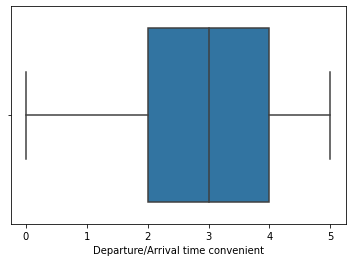

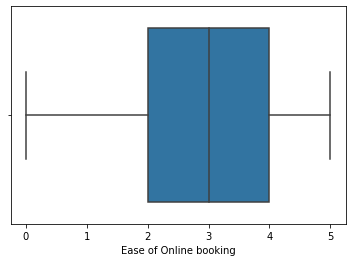

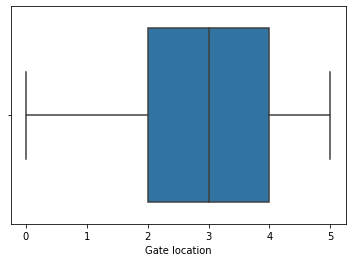

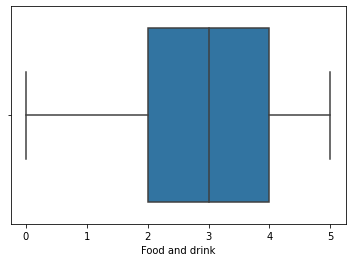

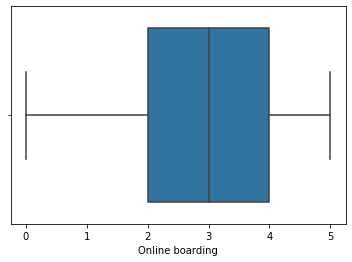

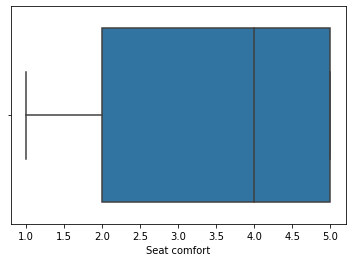

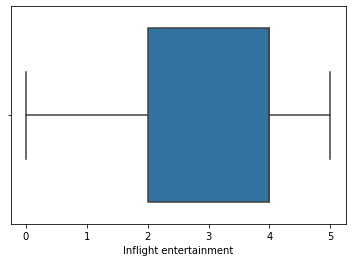

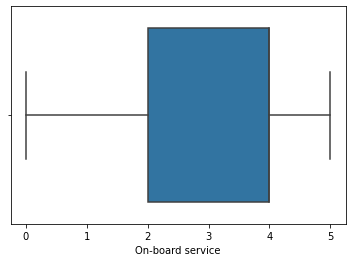

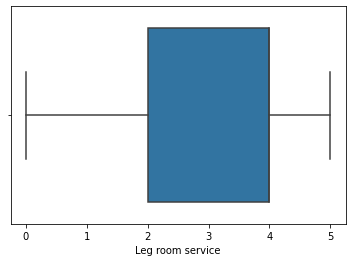

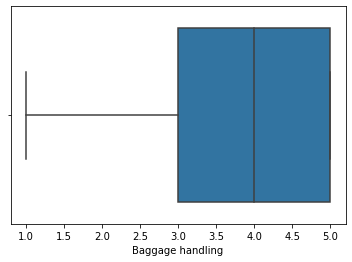

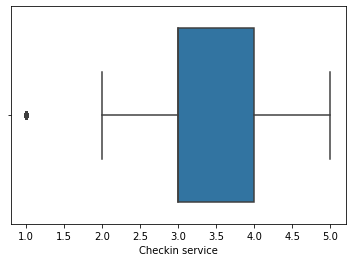

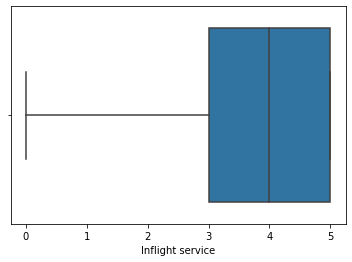

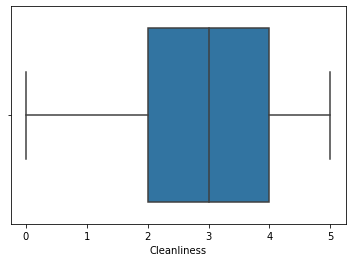

In [51]:
# Check for scale.

for col in num_train_data.columns:
    sb.boxplot(x = num_train_data[col])
    plt.show()

In [91]:
# Scaling the data.

from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

temp_train_array = std_scale.fit_transform(num_train_data)
temp_valid_array = std_scale.transform(num_valid_data)
temp_test_array = std_scale.transform(num_test_data)

scaled_train_data = pd.DataFrame(temp_train_array, 
                                 columns = num_train_data.columns.to_list())
scaled_valid_data = pd.DataFrame(temp_valid_array, 
                                 columns = num_valid_data.columns.to_list())
scaled_test_data = pd.DataFrame(temp_test_array, 
                                 columns = num_test_data.columns.to_list())

In [92]:
# Concatenating the data.

mod_train_data = pd.concat([scaled_train_data, train_log_data, obj_train_data],
                           axis = 1)
mod_valid_data = pd.concat([scaled_valid_data, valid_log_data, obj_valid_data],
                           axis = 1)
mod_test_data = pd.concat([scaled_test_data, test_log_data, obj_test_data],
                           axis = 1)

In [93]:
y_train = mod_train_data['satisfaction']
mod_train_data = mod_train_data.drop(columns = 'satisfaction')

y_valid = mod_valid_data['satisfaction']
mod_valid_data = mod_valid_data.drop(columns = 'satisfaction')

y_test = mod_test_data['satisfaction']
mod_test_data = mod_test_data.drop(columns = 'satisfaction')

In [94]:
print('Shape of Training data:', mod_train_data.shape)
print('Shape of Valid data:', mod_valid_data.shape)
print('Shape of Testing data:', mod_test_data.shape)

Shape of Training data: (72732, 22)
Shape of Valid data: (31172, 22)
Shape of Testing data: (25976, 22)


In [95]:
# Model development.

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [97]:
# Model selection.

In [98]:
lrclf = LogisticRegression()
lr_scores = cross_val_score(lrclf, X = mod_train_data, y = y_train, 
                            cv = 5, scoring = 'accuracy')

print('Score of Logistic Regression model:', np.round(lr_scores.mean(), 4))

Score of Logistic Regression model: 0.8756


In [99]:
dtclf = DecisionTreeClassifier()
dt_scores = cross_val_score(dtclf, X = mod_train_data, y = y_train, 
                            cv = 5, scoring = 'accuracy')

print('Score of Decision Tree model:', np.round(dt_scores.mean(), 4))

Score of Decision Tree model: 0.9431


In [100]:
adaclf = AdaBoostClassifier()
ada_scores = cross_val_score(adaclf, X = mod_train_data, y = y_train, 
                             cv = 5, scoring = 'accuracy')

print('Score of AdaBoost model:', np.round(ada_scores.mean(), 4))

Score of AdaBoost model: 0.9282


In [101]:
# Selecting Decision Tree classifier and performing Hyperparameter Tuning.

# Satisfied customer(TP) can be misclassified to dissatisfied customer(FN) but
# dissatisfied customers(TN) cannot be miscalssified to satisfied customer(FP)
# Therefore, tuning for high precision and low recall.

from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

# Default parameters.
dtclf1 = DecisionTreeClassifier()
dtclf1.fit(X = mod_train_data, y = y_train)

train_pred = dtclf1.predict(X = mod_train_data)
print('Precision on training data:', precision_score(y_true = y_train, 
                                                     y_pred = train_pred))
print('Recall on training data:', recall_score(y_true = y_train, 
                                               y_pred = train_pred),'\n')

valid_pred = dtclf1.predict(X = mod_valid_data)
print('Precision on Validation data:', precision_score(y_true = y_valid, 
                                                       y_pred = valid_pred))
print('Recall on Validation data:', recall_score(y_true = y_valid, 
                                                 y_pred = valid_pred))

Precision on training data: 1.0
Recall on training data: 1.0 

Precision on Validation data: 0.9355668209536404
Recall on Validation data: 0.940125507567368


In [102]:
# In the above model recall is high. We want precision.

# Modified parameters.
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [5, 10, 15, 20, 25, 30],
          'min_samples_split': range(100, 1000, 100)}

gridsearch = GridSearchCV(dtclf1, params, cv = 5, scoring = 'precision')
gridsearch_results = gridsearch.fit(X = mod_train_data, y = y_train)

In [103]:
print('Best score is:', gridsearch_results.best_score_)
print('Best parameters are:', gridsearch_results.best_params_)

Best score is: 0.9561832117878118
Best parameters are: {'max_depth': 15, 'min_samples_split': 200}


In [105]:
params = {'max_features': [5, 10, 15, 20]}

dtclf2 = DecisionTreeClassifier(max_depth = 15, min_samples_split = 200,
                                random_state = 0)

gridsearch = GridSearchCV(dtclf2, params, cv = 5, scoring = 'precision')
gridsearch_results = gridsearch.fit(X = mod_train_data, y = y_train)

print('Best score is:', gridsearch_results.best_score_)
print('Best parameters are:', gridsearch_results.best_params_)

Best score is: 0.9542728319418654
Best parameters are: {'max_features': 20}


In [106]:
params = {'criterion': ['gini', 'entropy']}

dtclf2 = DecisionTreeClassifier(max_depth = 15, min_samples_split = 200,
                                random_state = 0)

gridsearch = GridSearchCV(dtclf2, params, cv = 5, scoring = 'precision')
gridsearch_results = gridsearch.fit(X = mod_train_data, y = y_train)

print('Best score is:', gridsearch_results.best_score_)
print('Best parameters are:', gridsearch_results.best_params_)

Best score is: 0.9561832117878118
Best parameters are: {'criterion': 'gini'}


### Optimal values.
criterion = 'gini', <br>
max_depth = 15,  <br>
min_samples_split = 200

In [107]:
# Optimal parameters.

dtclf3 = DecisionTreeClassifier(max_depth = 15, min_samples_split = 200,
                                random_state = 0)
dtclf3.fit(X = mod_train_data, y = y_train)

train_pred = dtclf3.predict(X = mod_train_data)
print('Precision on training data:', precision_score(y_true = y_train, 
                                                     y_pred = train_pred))
print('Recall on training data:', recall_score(y_true = y_train, 
                                               y_pred = train_pred),'\n')

valid_pred = dtclf3.predict(X = mod_valid_data)
print('Precision on Validation data:', precision_score(y_true = y_valid, 
                                                       y_pred = valid_pred))
print('Recall on Validation data:', recall_score(y_true = y_valid, 
                                                 y_pred = valid_pred))

Precision on training data: 0.9595316622691293
Recall on training data: 0.9241740787801779 

Precision on Validation data: 0.9551760939167556
Recall on Validation data: 0.9250645994832042


In [108]:
# Testing on Test data.

test_pred = dtclf3.predict(X = mod_test_data)
print('Precision on Validation data:', precision_score(y_true = y_test, 
                                                       y_pred = test_pred))
print('Recall on Validation data:', recall_score(y_true = y_test, 
                                                 y_pred = test_pred))

Precision on Validation data: 0.9530669566005255
Recall on Validation data: 0.9224765412610717
